## EPICS OPC-UA Benchmarking Data

#### Physical Server

In [28]:
import os
import numpy as np
import pandas as pd

# Get list of directories
root='C:/Users/Shubham Balyan/Desktop/epics-benchmarking/physical_server/'
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]
print(dirlist)

['physical_server_1000_PVS_100.0_ms', 'physical_server_1000_PVS_20.0_ms', 'physical_server_1000_PVS_50.0_ms', 'physical_server_100_PVS_100.0_ms', 'physical_server_100_PVS_20.0_ms', 'physical_server_100_PVS_50.0_ms', 'physical_server_2000_PVS_100.0_ms', 'physical_server_2000_PVS_20.0_ms', 'physical_server_2000_PVS_50.0_ms', 'physical_server_500_PVS_100.0_ms', 'physical_server_500_PVS_20.0_ms', 'physical_server_500_PVS_50.0_ms']


In [29]:
def extract_info(dir_name):
    info = dir_name.split('_')
    return int(info[2]), float(info[4])

In [30]:
d = []
np.random.seed(20)
for dirs in dirlist:
    n, interval = extract_info(dirs)
    files = os.listdir(root+dirs)
    random_files = np.random.choice(files, int(len(files)*.05))
    file_avg_fault = 0
    file_avg_loss = 0
    for random_file in random_files:
        data_f = pd.read_csv(root+dirs+'/'+random_file)
        file_avg_fault = file_avg_fault + data_f['Delta'].mean()
        data_f['Match'] = np.where(data_f['Value Written'] == data_f['Value Read'], 'Y', 'N')
        loss_per_file = (data_f.Match == 'N').sum()
        file_avg_loss = file_avg_loss + loss_per_file/data_f.shape[0]

    d.append((n, interval, file_avg_fault/len(random_files), file_avg_loss/len(random_files)))
        
df = pd.DataFrame(d, columns=('Number of PVs', 'Time Interval', 'Avg Delay Fault (in ms) PS', 'Avg Data Loss PS'))        
df

,Number of PVs,Time Interval,Avg Delay Fault (in ms) PS,Avg Data Loss PS
0,1000,100.0,127.6480,0.0940
1,1000,20.0,35.0040,0.7710
2,1000,50.0,72.0180,0.2150
3,100,100.0,119.8200,0.1600
4,100,20.0,32.3440,0.8320
5,100,50.0,75.8100,0.2400
6,2000,100.0,137.6880,0.1110
7,2000,20.0,29.1990,0.7930
8,2000,50.0,75.4835,0.2465
9,500,100.0,133.1280,0.0920


#### Docker Deploy

In [31]:
# Get list of directories
root='C:/Users/Shubham Balyan/Desktop/epics-benchmarking/docker_deploy/'
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]
print(dirlist)

['docker_deploy_1000_PVS_100.0_ms', 'docker_deploy_1000_PVS_20.0_ms', 'docker_deploy_1000_PVS_50.0_ms', 'docker_deploy_100_PVS_100.0_ms', 'docker_deploy_100_PVS_20.0_ms', 'docker_deploy_100_PVS_50.0_ms', 'docker_deploy_2000_PVS_100.0_ms', 'docker_deploy_2000_PVS_20.0_ms', 'docker_deploy_2000_PVS_50.0_ms', 'docker_deploy_500_PVS_100.0_ms', 'docker_deploy_500_PVS_20.0_ms', 'docker_deploy_500_PVS_50.0_ms']


In [32]:
d = []
np.random.seed(20)
for dirs in dirlist:
    n, interval = extract_info(dirs)
    files = os.listdir(root+dirs)
    random_files = np.random.choice(files, int(len(files)*.05))
    file_avg_fault = 0
    file_avg_loss = 0
    for random_file in random_files:
        data_f = pd.read_csv(root+dirs+'/'+random_file)
        file_avg_fault = file_avg_fault + data_f['Delta'].mean()
        data_f['Match'] = np.where(data_f['Value Written'] == data_f['Value Read'], 'Y', 'N')
        loss_per_file = (data_f.Match == 'N').sum()
        file_avg_loss = file_avg_loss + loss_per_file/data_f.shape[0]

    d.append((n, interval, file_avg_fault/len(random_files), file_avg_loss/len(random_files)))
        
df_d = pd.DataFrame(d, columns=('Number of PVs', 'Time Interval', 'Avg Delay Fault (in ms) Docker', 'Avg Data Loss Docker'))        
df_d

,Number of PVs,Time Interval,Avg Delay Fault (in ms) Docker,Avg Data Loss Docker
0,1000,100.0,122.582000,0.070000
1,1000,20.0,38.318000,0.638000
2,1000,50.0,68.350000,0.217000
3,100,100.0,135.260000,0.100000
4,100,20.0,18.473333,0.820000
5,100,50.0,73.770000,0.240000
6,2000,100.0,129.225000,0.108000
7,2000,20.0,37.135333,0.688333
8,2000,50.0,81.601500,0.213000
9,500,100.0,124.360000,0.120000


In [33]:
# Concat two dataframes
df = pd.concat([df, df_d], axis=1)
df = df.loc[:,~df.columns.duplicated()]
df

,Number of PVs,Time Interval,Avg Delay Fault (in ms) PS,Avg Data Loss PS,Avg Delay Fault (in ms) Docker,Avg Data Loss Docker
0,1000,100.0,127.6480,0.0940,122.582000,0.070000
1,1000,20.0,35.0040,0.7710,38.318000,0.638000
2,1000,50.0,72.0180,0.2150,68.350000,0.217000
3,100,100.0,119.8200,0.1600,135.260000,0.100000
4,100,20.0,32.3440,0.8320,18.473333,0.820000
5,100,50.0,75.8100,0.2400,73.770000,0.240000
6,2000,100.0,137.6880,0.1110,129.225000,0.108000
7,2000,20.0,29.1990,0.7930,37.135333,0.688333
8,2000,50.0,75.4835,0.2465,81.601500,0.213000
9,500,100.0,133.1280,0.0920,124.360000,0.120000


## Average Delay Fault Visualization (for each value of Time Interval)

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

Text(0, 0.5, 'Average Delay Fault (in ms)')

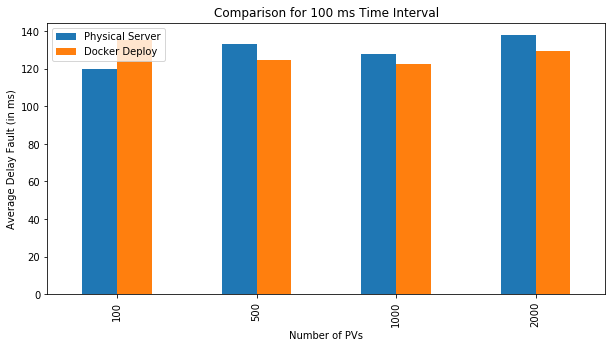

In [35]:
df1 = df[df['Time Interval'] == 100.0]
df1 = df1.sort_values(by=['Number of PVs'], ascending=True)

fig, ax = plt.subplots()
df1.plot(x="Number of PVs", y=["Avg Delay Fault (in ms) PS", "Avg Delay Fault (in ms) Docker"], kind="bar", ax=ax)
ax.legend(["Physical Server", "Docker Deploy"]);
plt.title('Comparison for 100 ms Time Interval')
ax.set_ylabel("Average Delay Fault (in ms)")

Text(0, 0.5, 'Average Delay Fault (in ms)')

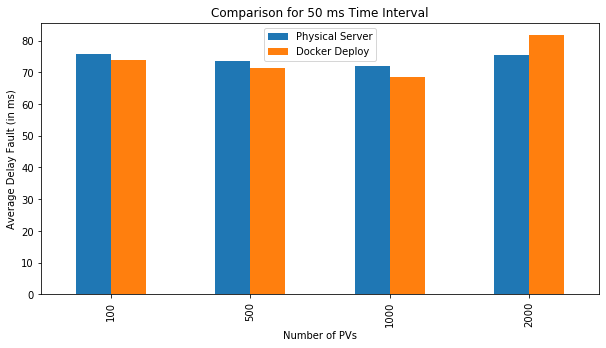

In [36]:
df2 = df[df['Time Interval'] == 50.0]
df2 = df2.sort_values(by=['Number of PVs'], ascending=True)

fig, ax = plt.subplots()
df2.plot(x="Number of PVs", y=["Avg Delay Fault (in ms) PS", "Avg Delay Fault (in ms) Docker"], kind="bar", ax=ax)
ax.legend(["Physical Server", "Docker Deploy"]);
plt.title('Comparison for 50 ms Time Interval')
ax.set_ylabel("Average Delay Fault (in ms)")

Text(0, 0.5, 'Average Delay Fault (in ms)')

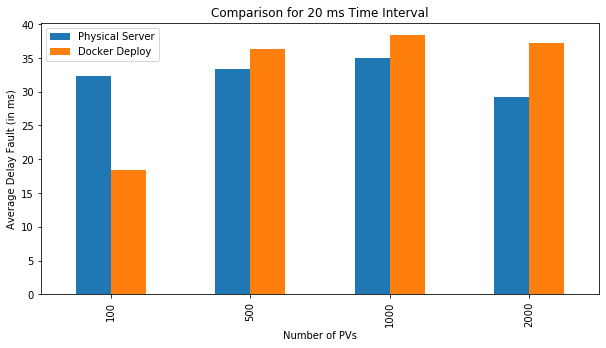

In [37]:
df3 = df[df['Time Interval'] == 20.0]
df3 = df3.sort_values(by=['Number of PVs'], ascending=True)

fig, ax = plt.subplots()
df3.plot(x="Number of PVs", y=["Avg Delay Fault (in ms) PS", "Avg Delay Fault (in ms) Docker"], kind="bar", ax=ax)
ax.legend(["Physical Server", "Docker Deploy"]);
plt.title('Comparison for 20 ms Time Interval')
ax.set_ylabel("Average Delay Fault (in ms)")

## Average Data Loss Visualization (for each value of Time Interval)

Text(0, 0.5, 'Average Data Loss')

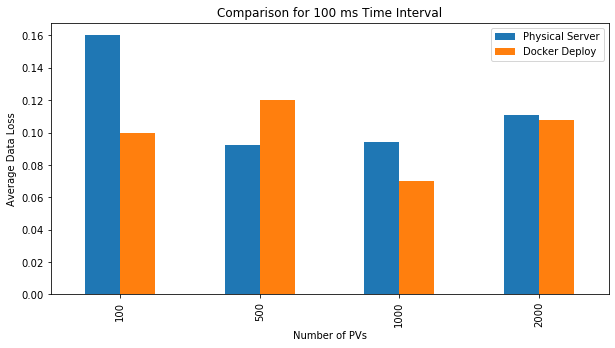

In [38]:
fig, ax = plt.subplots()
df1.plot(x="Number of PVs", y=["Avg Data Loss PS", "Avg Data Loss Docker"], kind="bar", ax=ax)
ax.legend(["Physical Server", "Docker Deploy"]);
plt.title('Comparison for 100 ms Time Interval')
ax.set_ylabel("Average Data Loss")

Text(0, 0.5, 'Average Data Loss')

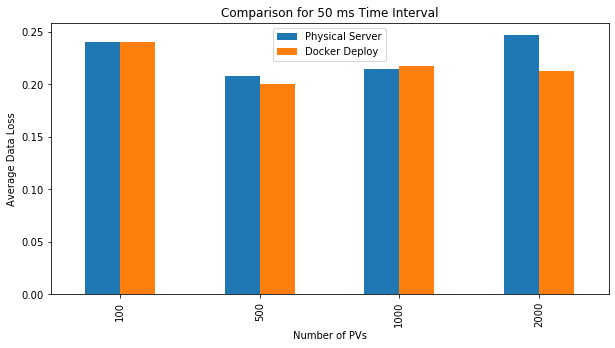

In [39]:
fig, ax = plt.subplots()
df2.plot(x="Number of PVs", y=['Avg Data Loss PS', 'Avg Data Loss Docker'], kind="bar", ax=ax)
ax.legend(["Physical Server", "Docker Deploy"]);
plt.title('Comparison for 50 ms Time Interval')
ax.set_ylabel("Average Data Loss")

Text(0, 0.5, 'Average Data Loss')

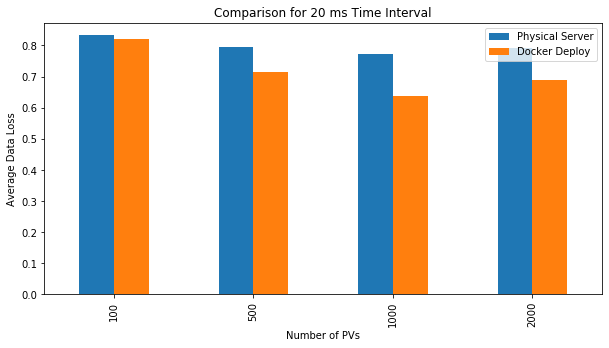

In [40]:
fig, ax = plt.subplots()
df3.plot(x="Number of PVs", y=["Avg Data Loss PS", "Avg Data Loss Docker"], kind="bar", ax=ax)
ax.legend(["Physical Server", "Docker Deploy"]);
plt.title('Comparison for 20 ms Time Interval')
ax.set_ylabel("Average Data Loss")